<a href="https://colab.research.google.com/github/ASTROA-MAN/DATA_SCIENCE_PROJECTS/blob/main/Project8_Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE DEPENDENCIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**DATA COLLECTION AND PROCESSING**

In [2]:
# Loading The csv Data To A pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
# First 5 Rows Of The Dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
# Last 5 Rows Of The Dataset
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
# Number Of Rows And Columns
gold_data.shape

(2290, 6)

In [5]:
# Statistical Description Of The Dataset
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
# Checking The Missing Values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

**CORRELATION**

1. POSITIVE CORRELATION

2. NEGATIVE CORRELATION

In [10]:
correlation = gold_data.corr()

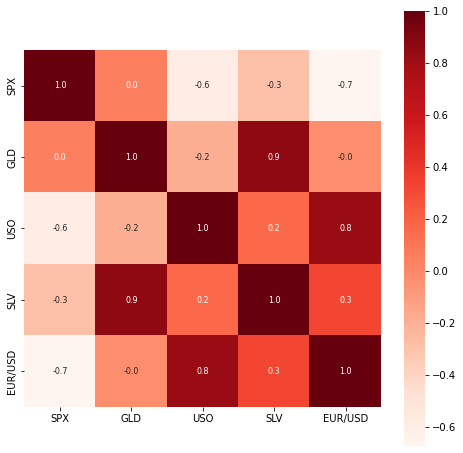

In [11]:
# Constructing The Heatmap To Understand The Correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [12]:
# Correlation Values Of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


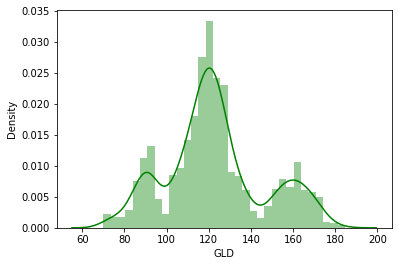

In [13]:
# Checking The Distribution Of The GLD Price
sns.distplot(gold_data['GLD'], color='green')

**SPLITTING THE FEATURES AND TARGET**

In [14]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y =  gold_data['GLD']

In [15]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


**SPLITTING INTO TRAINING AND TESTING DATASET**

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


**MODEL TRAINING**

RANDOM FOREST REGRESSOR

In [18]:
regressor = RandomForestRegressor(n_estimators=100)

In [19]:
# Training The Model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

**MODEL EVALUATION**

In [21]:
# Prediction On Test Data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.60679874  82.24379954 115.84200022 127.64510081 120.76150104
 154.79949767 150.34679791 126.30030046 117.54969897 126.08710079
 116.40350104 172.21520128 141.47249839 167.72009838 115.12540012
 117.9307007  138.67230332 169.87210089 159.62330343 157.42299961
 155.16830057 124.9823005  175.63570065 157.23350329 125.17970057
  93.81959964  77.29410001 120.71430033 119.09609961 167.46849889
  88.43220029 125.21669974  91.02320074 117.64830033 121.13049941
 136.22530096 115.39930109 115.1728008  147.39369995 107.28400088
 104.36100225  87.16919816 126.54760055 117.94840005 152.88409929
 119.50730007 108.43270001 107.91889819  93.06990069 127.19479737
  74.92020043 113.67739943 121.09349999 111.27539959 118.97239916
 120.75509919 158.79580058 168.29600081 147.06989638  85.89549863
  94.17210012  86.67369859  90.73909964 118.75180088 126.47200036
 127.70570034 170.58960076 122.26949911 117.41059901  98.30900044
 168.70590165 143.13009804 132.36080308 121.28090218 121.08199954
 119.75780

In [23]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error :", error_score)

R Squared Error : 0.9890201023371664


COMPARING THE ACTUAL VALUES AND PREDICTED VALUES IN A PLOT

In [24]:
Y_test = list(Y_test)

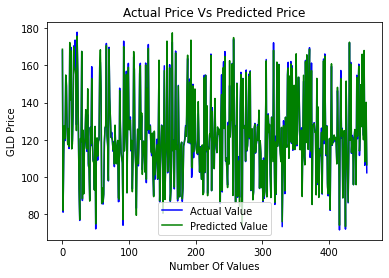

In [25]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.xlabel('Number Of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.title('Actual Price Vs Predicted Price')
plt.show()